In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Company_Data.csv')

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df['ShelveLoc'].value_counts()


Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64

In [6]:
df['US'].value_counts()

Yes    258
No     142
Name: US, dtype: int64

In [7]:
df["Urban"].value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [8]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


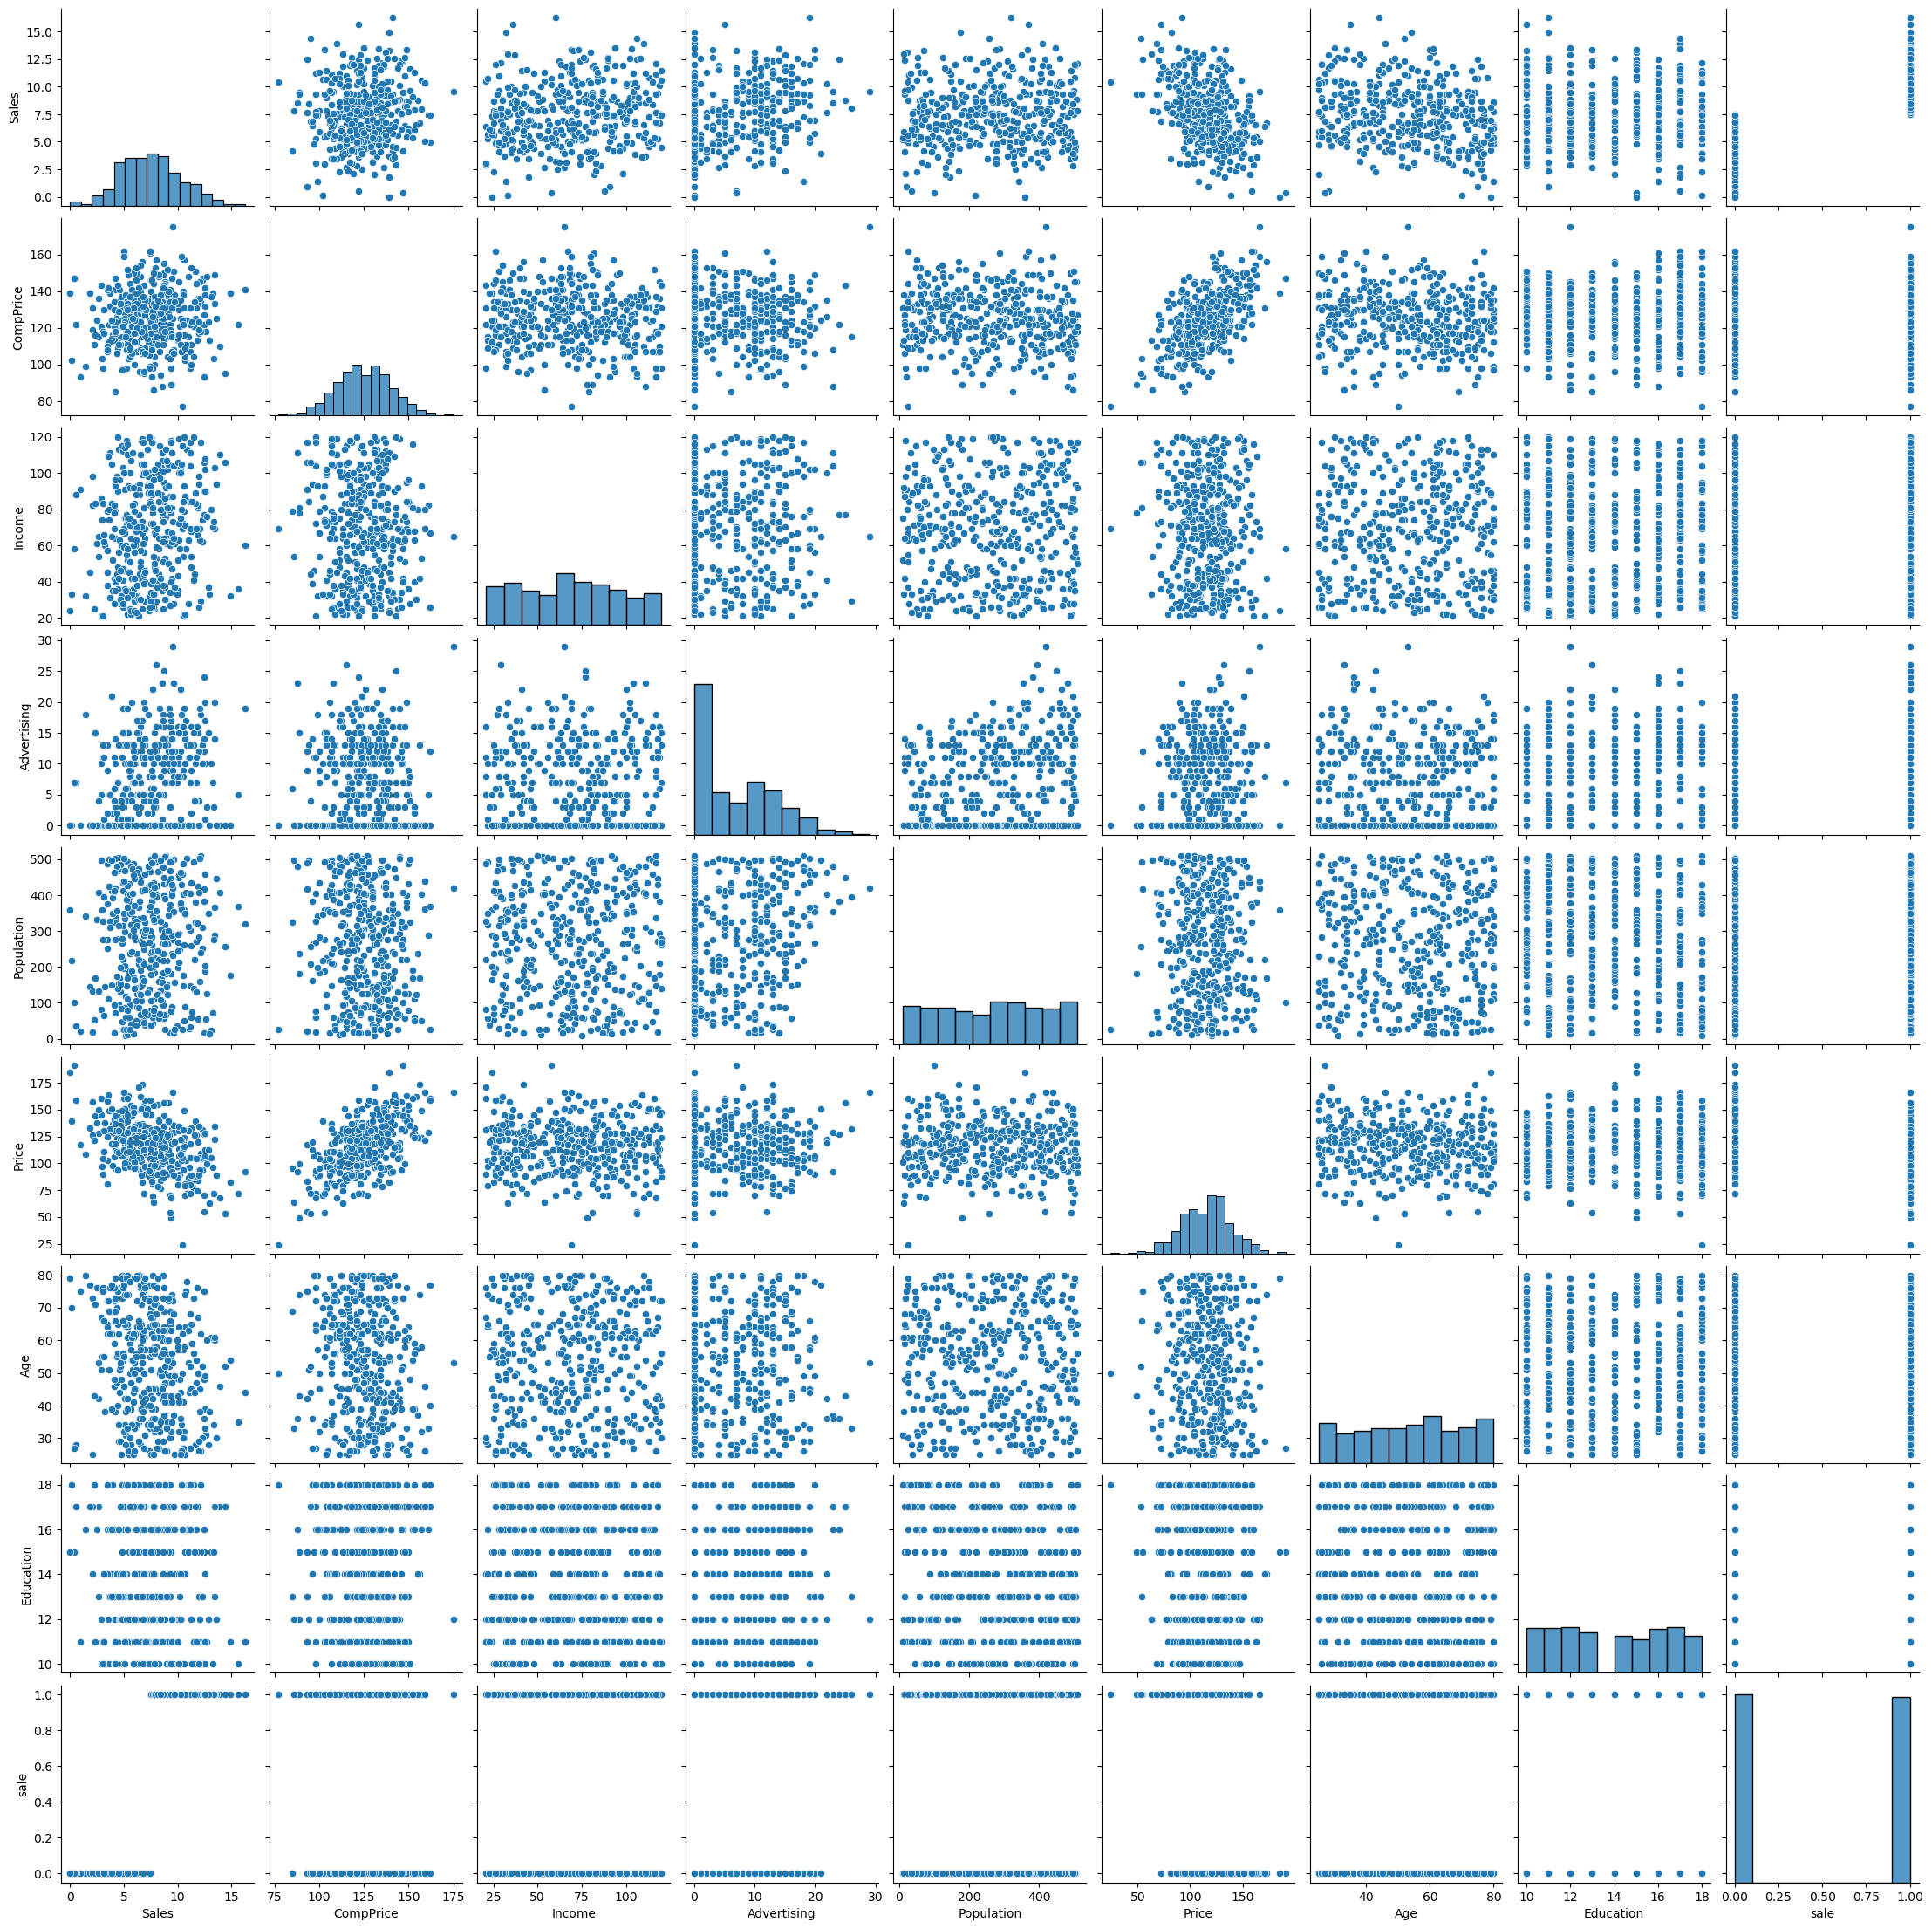

In [60]:
sns.pairplot(data=df)

In [10]:
sale = [] 
for i in df['Sales'] : 
    if i <=np.mean(df['Sales']) :
         sale.append(0)
    else : 
         sale.append(1)
df['sale']=sale

In [11]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0


In [12]:
df_new = df.drop('Sales',axis=1)

In [13]:
df_new

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale
0,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,141,64,3,340,128,Bad,38,13,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,Good,33,14,Yes,Yes,1
396,139,23,3,37,120,Medium,55,11,No,Yes,0
397,162,26,12,368,159,Medium,40,18,Yes,Yes,0
398,100,79,7,284,95,Bad,50,12,Yes,Yes,0


In [14]:
from sklearn.preprocessing import LabelEncoder
comapny = LabelEncoder()


In [15]:
df_new['ShelveLoc']=comapny.fit_transform(df_new['ShelveLoc'])
df_new['US']=comapny.fit_transform(df_new['US'])
df_new['Urban']=comapny.fit_transform(df_new['Urban'])

In [16]:
df_new

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sale
0,138,73,11,276,120,0,42,17,1,1,1
1,111,48,16,260,83,1,65,10,1,1,1
2,113,35,10,269,80,2,59,12,1,1,1
3,117,100,4,466,97,2,55,14,1,1,0
4,141,64,3,340,128,0,38,13,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,1
396,139,23,3,37,120,2,55,11,0,1,0
397,162,26,12,368,159,2,40,18,1,1,0
398,100,79,7,284,95,0,50,12,1,1,0


In [17]:
# Spliting the data into training and testing 
X = df_new.iloc[:,0:9]

In [18]:
Y = df_new['sale']

In [19]:
X.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban
0,138,73,11,276,120,0,42,17,1
1,111,48,16,260,83,1,65,10,1
2,113,35,10,269,80,2,59,12,1
3,117,100,4,466,97,2,55,14,1
4,141,64,3,340,128,0,38,13,1


In [20]:
Y.head()

0    1
1    1
2    1
3    0
4    0
Name: sale, dtype: int64

In [21]:
# Spliting the data into training and testing 
from sklearn .model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=40)

In [22]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban
85,125,103,0,304,112,2,49,13,0
69,127,59,0,339,99,2,65,12,1
203,131,82,0,132,157,0,25,14,1
379,125,111,0,404,107,0,54,15,1
261,121,42,4,188,118,2,54,15,1
...,...,...,...,...,...,...,...,...,...
306,131,32,1,85,133,2,48,12,1
165,147,58,7,100,191,0,27,15,1
7,136,81,15,425,120,1,67,10,1
219,116,79,19,359,116,1,58,17,1


In [23]:
x_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban
132,125,87,9,232,136,1,72,10,1
390,108,75,9,61,111,2,67,12,1
310,175,65,29,419,166,2,53,12,1
3,117,100,4,466,97,2,55,14,1
248,111,52,0,12,101,2,61,11,1
...,...,...,...,...,...,...,...,...,...
361,131,25,10,183,104,2,56,15,0
197,124,61,0,333,138,2,76,16,1
23,121,31,0,292,109,2,79,10,1
54,134,103,13,25,144,2,76,17,0


# Building Decision Tree classifier using entropy criteria

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [25]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [26]:
#help(DecisionTreeClassifier)

[Text(0.5, 0.875, 'X[4] <= 131.5\nentropy = 1.0\nsamples = 320\nvalue = [156, 164]'),
 Text(0.25, 0.625, 'X[2] <= 11.5\nentropy = 0.969\nsamples = 245\nvalue = [97, 148]'),
 Text(0.125, 0.375, 'X[4] <= 90.5\nentropy = 0.999\nsamples = 178\nvalue = [86, 92]'),
 Text(0.0625, 0.125, 'entropy = 0.544\nsamples = 32\nvalue = [4, 28]'),
 Text(0.1875, 0.125, 'entropy = 0.989\nsamples = 146\nvalue = [82, 64]'),
 Text(0.375, 0.375, 'X[6] <= 56.5\nentropy = 0.644\nsamples = 67\nvalue = [11, 56]'),
 Text(0.3125, 0.125, 'entropy = 0.183\nsamples = 36\nvalue = [1, 35]'),
 Text(0.4375, 0.125, 'entropy = 0.907\nsamples = 31\nvalue = [10, 21]'),
 Text(0.75, 0.625, 'X[0] <= 146.5\nentropy = 0.748\nsamples = 75\nvalue = [59, 16]'),
 Text(0.625, 0.375, 'X[2] <= 23.0\nentropy = 0.497\nsamples = 55\nvalue = [49, 6]'),
 Text(0.5625, 0.125, 'entropy = 0.386\nsamples = 53\nvalue = [49, 4]'),
 Text(0.6875, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.875, 0.375, 'X[4] <= 149.5\nentropy = 1.0\ns

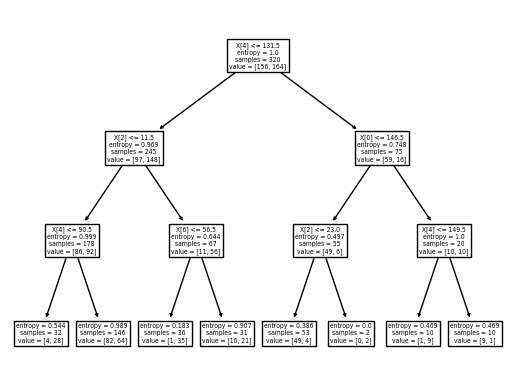

In [27]:
#plot the decision tree
tree.plot_tree(model)

In [28]:
y_train.value_counts()

1    164
0    156
Name: sale, dtype: int64

[Text(0.5, 0.875, 'Price <= 131.5\nentropy = 1.0\nsamples = 320\nvalue = [156, 164]\nclass = 1'),
 Text(0.25, 0.625, 'Advertising <= 11.5\nentropy = 0.969\nsamples = 245\nvalue = [97, 148]\nclass = 1'),
 Text(0.125, 0.375, 'Price <= 90.5\nentropy = 0.999\nsamples = 178\nvalue = [86, 92]\nclass = 1'),
 Text(0.0625, 0.125, 'entropy = 0.544\nsamples = 32\nvalue = [4, 28]\nclass = 1'),
 Text(0.1875, 0.125, 'entropy = 0.989\nsamples = 146\nvalue = [82, 64]\nclass = 0'),
 Text(0.375, 0.375, 'Age <= 56.5\nentropy = 0.644\nsamples = 67\nvalue = [11, 56]\nclass = 1'),
 Text(0.3125, 0.125, 'entropy = 0.183\nsamples = 36\nvalue = [1, 35]\nclass = 1'),
 Text(0.4375, 0.125, 'entropy = 0.907\nsamples = 31\nvalue = [10, 21]\nclass = 1'),
 Text(0.75, 0.625, 'CompPrice <= 146.5\nentropy = 0.748\nsamples = 75\nvalue = [59, 16]\nclass = 0'),
 Text(0.625, 0.375, 'Advertising <= 23.0\nentropy = 0.497\nsamples = 55\nvalue = [49, 6]\nclass = 0'),
 Text(0.5625, 0.125, 'entropy = 0.386\nsamples = 53\nvalue = [

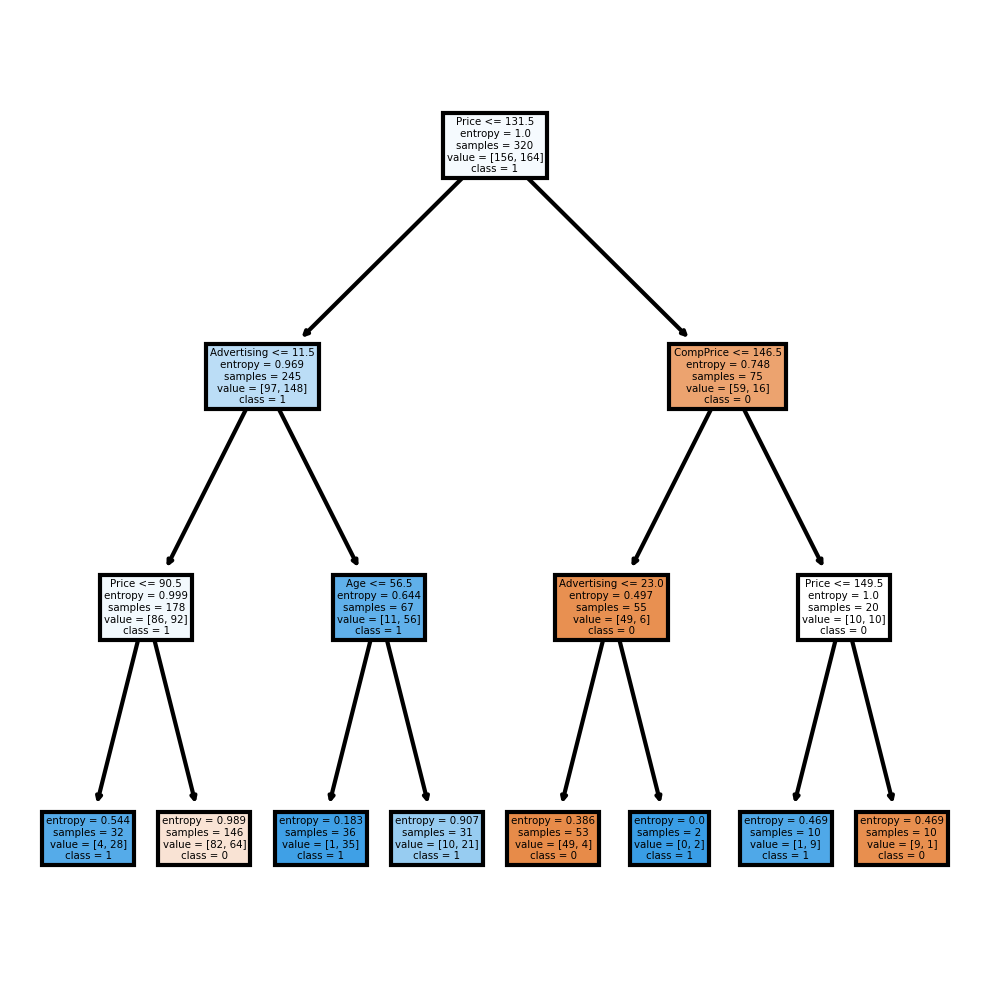

In [29]:
import matplotlib.pyplot as plt
fn = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','Us']
cn = ['0','1']
fig,axes = plt.subplots(nrows =1,ncols = 1,figsize =(4,4),dpi=300)
tree.plot_tree(model,feature_names=fn,class_names=cn,filled=True)

In [30]:
# Predicting on test data 
preds = model.predict(x_test)


In [31]:
preds

array([0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [32]:
y_test

132    1
390    0
310    1
3      0
248    0
      ..
361    1
197    0
23     0
54     0
58     0
Name: sale, Length: 80, dtype: int64

In [33]:
# getting 2 way table to understand the correct and wrong predictions 
pd.crosstab(y_test,preds)

col_0,0,1
sale,,
0,38,7
1,18,17


In [34]:
model.score(x_train,y_train)

0.734375

In [35]:
# Accuracy 
np.mean(preds==y_test)

0.6875

In [36]:
model_1 = DecisionTreeClassifier(criterion='entropy',max_depth=4)
model_1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

[Text(0.5267857142857143, 0.9, 'Price <= 131.5\nentropy = 1.0\nsamples = 320\nvalue = [156, 164]\nclass = 1'),
 Text(0.2857142857142857, 0.7, 'Advertising <= 11.5\nentropy = 0.969\nsamples = 245\nvalue = [97, 148]\nclass = 1'),
 Text(0.14285714285714285, 0.5, 'Price <= 90.5\nentropy = 0.999\nsamples = 178\nvalue = [86, 92]\nclass = 1'),
 Text(0.07142857142857142, 0.3, 'Income <= 25.5\nentropy = 0.544\nsamples = 32\nvalue = [4, 28]\nclass = 1'),
 Text(0.03571428571428571, 0.1, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = 0'),
 Text(0.10714285714285714, 0.1, 'entropy = 0.353\nsamples = 30\nvalue = [2, 28]\nclass = 1'),
 Text(0.21428571428571427, 0.3, 'CompPrice <= 139.5\nentropy = 0.989\nsamples = 146\nvalue = [82, 64]\nclass = 0'),
 Text(0.17857142857142858, 0.1, 'entropy = 0.959\nsamples = 131\nvalue = [81, 50]\nclass = 0'),
 Text(0.25, 0.1, 'entropy = 0.353\nsamples = 15\nvalue = [1, 14]\nclass = 1'),
 Text(0.42857142857142855, 0.5, 'Age <= 56.5\nentropy = 0.644\nsamples = 67\

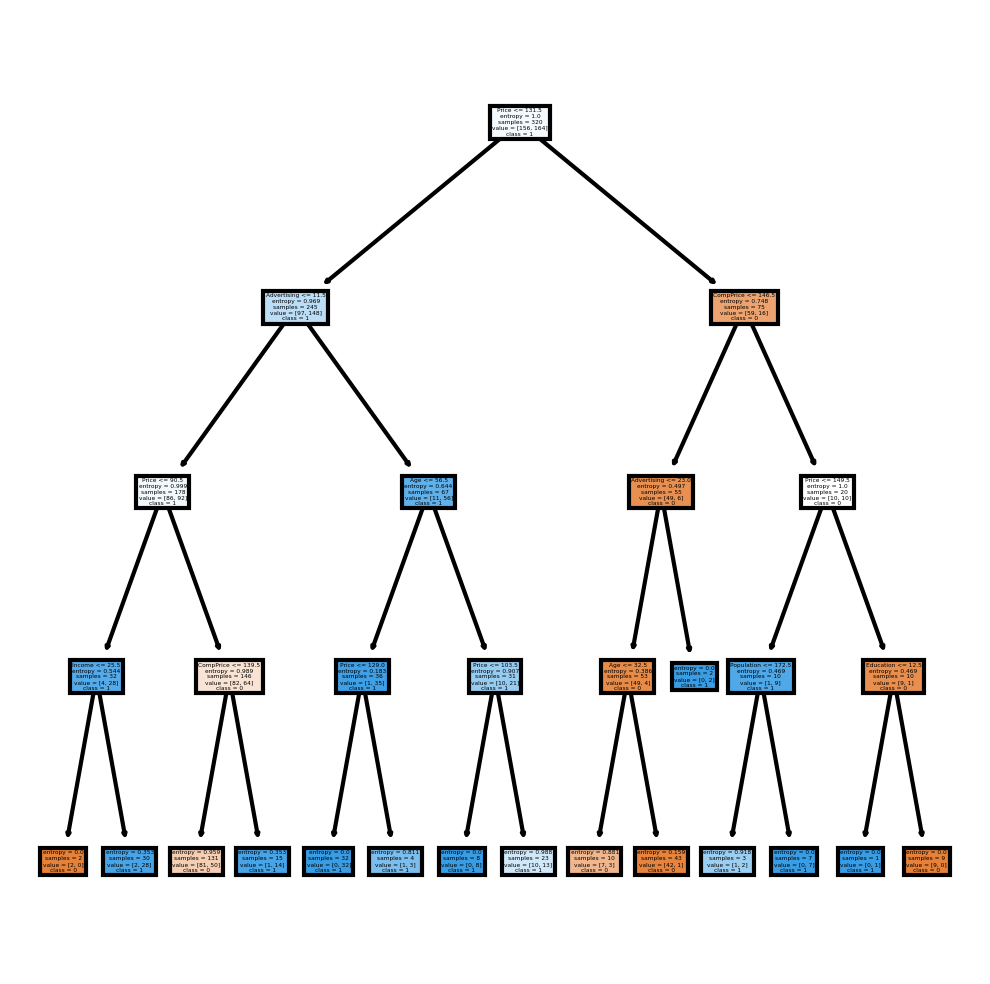

In [37]:
import matplotlib.pyplot as plt
fn = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','Us']
cn = ['0','1']
fig,axes = plt.subplots(nrows =1,ncols = 1,figsize =(4,4),dpi=300)
tree.plot_tree(model_1,feature_names=fn,class_names=cn,filled=True)

In [38]:
preds_1 = model_1.predict(x_test)

In [39]:
preds_1

array([0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1], dtype=int64)

In [40]:
pd.crosstab(y_test,preds_1)

col_0,0,1
sale,,
0,34,11
1,15,20


In [41]:
model_1.score(x_train,y_train)

0.784375

In [42]:
np.mean(preds_1==y_test)

0.675

In [43]:
model_2 = DecisionTreeClassifier(criterion='entropy',max_depth=5)
model_2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

[Text(0.5427631578947368, 0.9166666666666666, 'Price <= 131.5\nentropy = 1.0\nsamples = 320\nvalue = [156, 164]\nclass = 1'),
 Text(0.29605263157894735, 0.75, 'Advertising <= 11.5\nentropy = 0.969\nsamples = 245\nvalue = [97, 148]\nclass = 1'),
 Text(0.14473684210526316, 0.5833333333333334, 'Price <= 90.5\nentropy = 0.999\nsamples = 178\nvalue = [86, 92]\nclass = 1'),
 Text(0.05263157894736842, 0.4166666666666667, 'Income <= 25.5\nentropy = 0.544\nsamples = 32\nvalue = [4, 28]\nclass = 1'),
 Text(0.02631578947368421, 0.25, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = 0'),
 Text(0.07894736842105263, 0.25, 'CompPrice <= 99.5\nentropy = 0.353\nsamples = 30\nvalue = [2, 28]\nclass = 1'),
 Text(0.05263157894736842, 0.08333333333333333, 'entropy = 0.764\nsamples = 9\nvalue = [2, 7]\nclass = 1'),
 Text(0.10526315789473684, 0.08333333333333333, 'entropy = 0.0\nsamples = 21\nvalue = [0, 21]\nclass = 1'),
 Text(0.23684210526315788, 0.4166666666666667, 'CompPrice <= 139.5\nentropy = 0.989

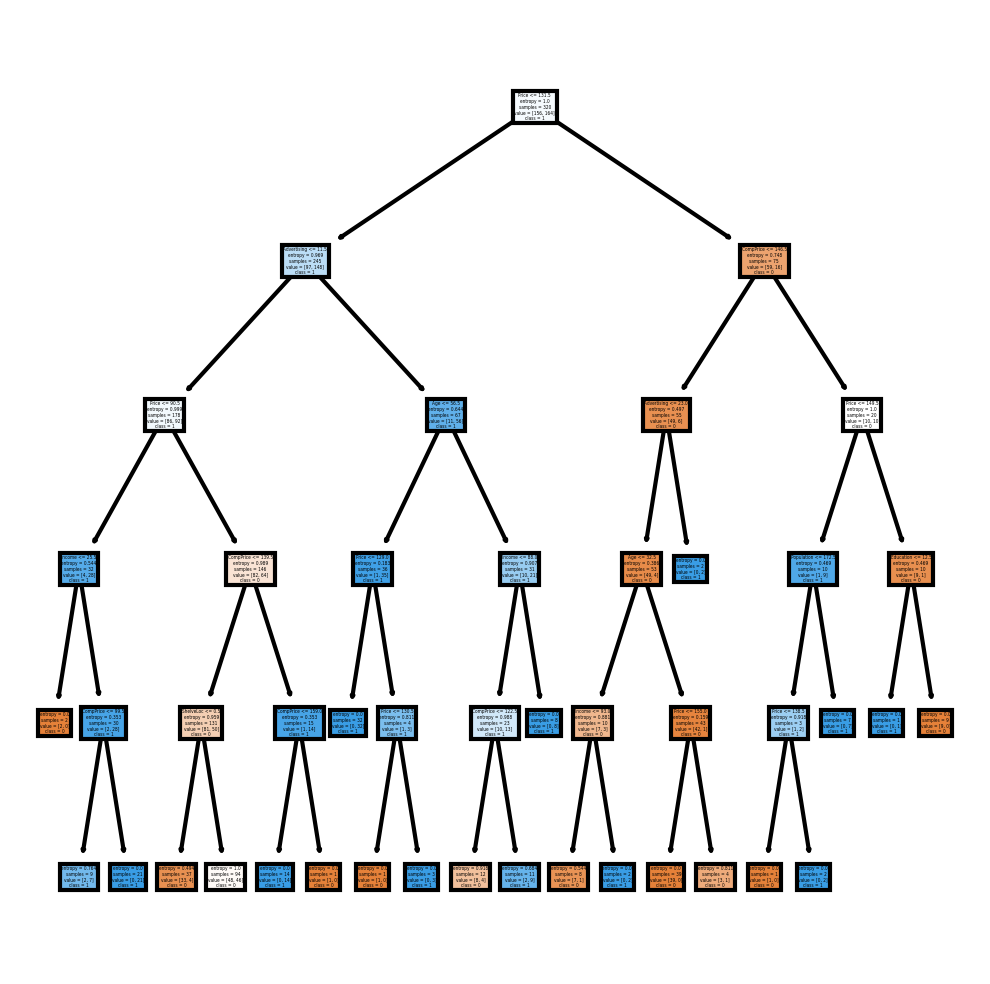

In [44]:
import matplotlib.pyplot as plt
fn = ['CompPrice','Income','Advertising','Population','Price','ShelveLoc','Age','Education','Urban','Us']
cn = ['0','1']
fig,axes = plt.subplots(nrows =1,ncols = 1,figsize =(4,4),dpi=300)
tree.plot_tree(model_2,feature_names=fn,class_names=cn,filled=True)

In [45]:
preds_2= model_2.predict(x_test)

In [46]:
model_2.score(x_train,y_train)

0.8125

In [47]:
np.mean(preds_2==y_test)

0.6375

# Building decision tree classifier (CART) using Gini Criteria

In [48]:
model_gini = DecisionTreeClassifier(criterion='gini',max_depth=3)

In [49]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [50]:
# Prediction and computing the accuracy 
pred_gini = model_gini.predict(x_test)

In [51]:
pred_gini

array([0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1], dtype=int64)

In [52]:
model_gini.score(x_train,y_train)

0.775

In [53]:
np.mean(pred_gini==y_test)

0.7125

In [54]:
model_gini_1 = DecisionTreeClassifier(criterion='gini',max_depth=5)

In [55]:
model_gini_1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

In [56]:
pred_gini_1 = model_gini_1.predict(x_test)

In [57]:
model_gini_1.score(x_train,y_train)

0.8875

In [58]:
np.mean(pred_gini_1==y_test)

0.7625

In [59]:
# By Using Gini criteria and assigning max depth =5 ,in that case model is in Genarlizing state.